In [1]:
library(tidyverse)
library(ggplot2)
library(stringr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Ripple

Hier werden alle Ripple Daten zusammengefügt

## News

### Sentiment

In [2]:
ripple_news_sentiment = read.csv2("./Data/NewsSentiment/Sentinment_Ripple.csv", sep=";")
head(ripple_news_sentiment)

headline                                                                 
1 CaixaBank forms gen AI team, Ripple rebrands cross-border payments       
2 How Ripple is trying to reach new audiences                              
3 BNPL debt accumulates in the U.K., Ripple expands cross-border tech      
4 Bank failures' ripple effects                                            
5 How a Ripple CBDC project in Montenegro could influence payments globally
6 Banking crisis ripple effects hit the payments industry                  
  description                                                                                                                                                                                                                                                             
1 CaixaBank assembled a team of more than 100 people focused on generative artificial intelligence products, Ripple changed the name of RippleNet to Ripple Payments, and more.                                                                                           
2 The blockchain company is targeting non-financial clients and new geographic regions in a series of product rollouts.                                                                                                                                                   
3 The U.K.'s Financial Conduct Authority released data that shows buy now/pay later lending on the rise, Ripple is working with Uphold to improve crypto liquidity and more.                                                                                              
4 Ever since Silicon Valley and Signature banks collapsed in March, a scramble began among regulators, politicians, bank executives and others to manage the fallout from this spring's banking crisis. Here are 10 predictions of what still lies ahead to be dealt with.
5 The blockchain company is working on a model for central bank digital currencies that it hopes will make it easier to transact across borders.                                                                                                                          
6 A  letter from U.K. regulators threatening to close risky companies is an example of how governments are pressuring firms that manage cash flow and fraud risk.                                                                                                         
  url                    date       sentiment.positive sentiment.negative
1 www.americanbanker.com 2023-12-13 0.44               0.44              
2 www.americanbanker.com 2023-11-21 0.59               0.24              
3 www.americanbanker.com 2023-11-01 0.40               0.40              
4 www.americanbanker.com 2023-05-29 0.20               0.55              
5 www.americanbanker.com 2023-04-18 0.60               0.16              
6 www.americanbanker.com 2023-03-24 0.38               0.52              
  sentiment.neutral
1 0.11             
2 0.16             
3 0.20             
4 0.25             
5 0.24             
6 0.10

In [3]:
ripple_news_sentiment %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    group_by(sentiment) %>%
    summarise(menge = n())%>%
    head()

sentiment menge
1 neg        928 
2 pos       1830

In [4]:
ripple_news_sentiment %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    group_by(week = cut(date, "week")) %>%
    summarise(sentiment = mean(sentiment)) -> ripple_news_sentiment_w

In [5]:
ripple_news_sentiment_w %>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    group_by(sentiment) %>%
    summarise(menge = n())%>%
    head()

sentiment menge
1 neg         6  
2 pos       104

In [6]:
ripple_news_sentiment %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    group_by(date) %>%
    summarise(sentiment = mean(sentiment)) -> ripple_news_sentiment_d

In [7]:
ripple_news_sentiment_d %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    group_by(sentiment) %>%
    summarise(menge = n())

sentiment menge
1 neg       141  
2 pos       562

### Menge

In [8]:
ripple_news_sentiment %>%
    mutate(date = as.Date(date)) %>%
    group_by(week = cut(date, "week")) %>%
    summarise(menge = n()) -> ripple_news_menge_w

## Comments

### Sentiment

In [9]:
ripple_comment_sentiment = read.csv2("./Data/CommentsSentiment/Sentinment_XRP.csv", sep=";")
head(ripple_comment_sentiment)

headline                                                                                                             
1 Get your funds ready to pull the buy trigger                                                                         
2 Where you at Jack BB? I hope nobody listened to yo yesterday.                                                        
3 0.74 5 months later again 0.74 long live xrp. :))                                                                    
4 It will return back to 0.72 today and close the weekly there. next week is the real bull run and only xrp will go up.
5 Great coin, now is the best time to buy, Space ID                                                                    
6 its just question of time                                                                                            
  date       sentiment.positive sentiment.negative sentiment.neutral
1 2024-03-17 1                  0                  0                
2 2024-03-17 0                  0                  1                
3 2024-03-15 0                  0                  1                
4 2024-03-15 0                  0                  1                
5 2024-03-14 0                  0                  1                
6 2024-03-14 0                  0                  1

In [10]:
ripple_comment_sentiment %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    group_by(week = cut(date, "week")) %>%
    summarise(sentiment = mean(sentiment)) -> ripple_comment_sentiment_w
    

`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.


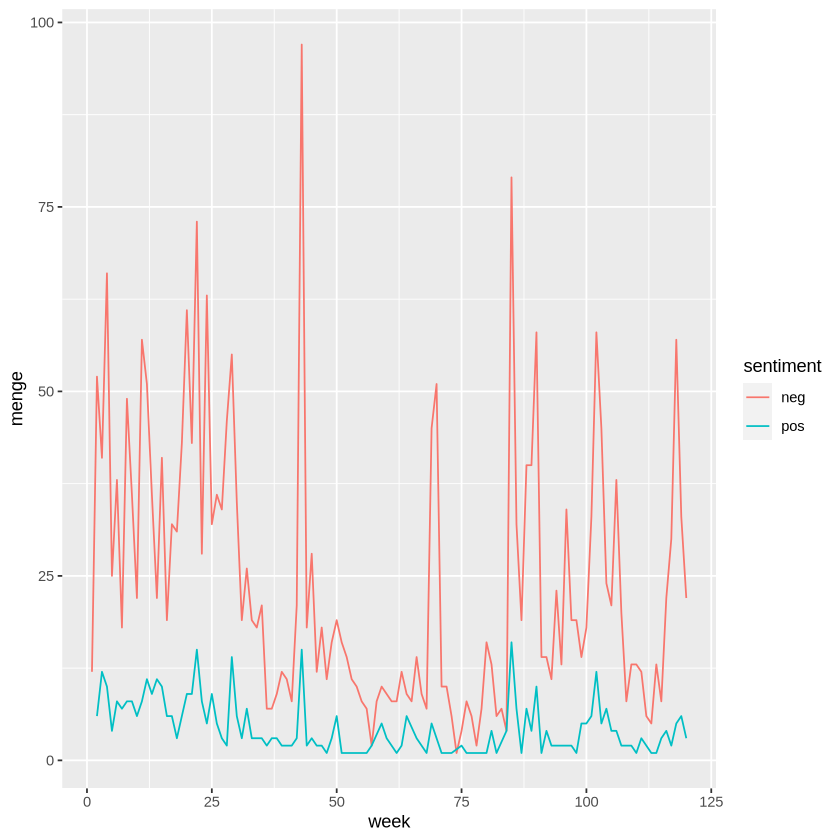

In [11]:
ripple_comment_sentiment %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    mutate(date = as.Date(date)) %>%
    mutate(week = cut.Date(date, breaks = "1 week", labels = FALSE)) %>%
    group_by(week, sentiment) %>%
    summarise(menge = n())%>%
    ggplot(aes(x = week, y = menge)) + geom_line(aes(color=sentiment))

### Menge

In [12]:
ripple_comment_sentiment %>%
    mutate(date = as.Date(date)) %>%
    group_by(week = cut(date, "week")) %>%
    summarise(menge = n()) -> ripple_comment_menge_w

## Google Trends

In [13]:
ripple_trends = read.csv2("./Data/GoogleTrends/rippleTrends.csv", sep=",")
head(ripple_trends)

Woche      Ripple XRP
1 2019-03-17  9     5  
2 2019-03-24  8     5  
3 2019-03-31 13     8  
4 2019-04-07 10     6  
5 2019-04-14 10     6  
6 2019-04-21  9     5

In [14]:
ripple_trends %>%
    mutate(date = as.Date(Woche)) %>%
    filter(date >= "2021-01-01") %>%
    filter(date <= "2024-02-01") %>%
    mutate(trend = XRP / 100)%>%
    group_by(week = cut(date, "week")) %>%
    summarise(trend = mean(trend)) -> ripple_trends_w

## Ripple Preis

In [15]:
coin_history = read.csv2("./Data/coin_history.csv")
head(coin_history)

X coin    date         value        type      
1 1 Bitcoin 1.613693e+12 9.639114e+11 market_cap
2 2 Bitcoin 1.613779e+12 1.044190e+12 market_cap
3 3 Bitcoin 1.613866e+12 1.050556e+12 market_cap
4 4 Bitcoin 1.613952e+12 1.075380e+12 market_cap
5 5 Bitcoin 1.614038e+12 1.012092e+12 market_cap
6 6 Bitcoin 1.614125e+12 9.041338e+11 market_cap

In [16]:
coin_history %>%
    mutate(date = as.Date(as.POSIXct(date/ 1000, origin="1970-01-01"))) %>%
    filter(type == "prices") %>% 
    filter(date >= "2021-12-01") %>%
    filter(date <= "2024-02-01") %>%
    filter(coin == "XRP")%>%
    group_by(week = cut(date, "week")) %>%
    summarise(open = first(value), close = last(value)) %>%
    mutate(return.p = ((close - lag(close)) / lag(close)) * 100)%>%
    mutate(return = close - lag(close)) %>%
    mutate(week = as.Date(week)) %>%
    filter(week >= "2021-12-27") -> ripple_history_w

## Regression

In [17]:
ripple = merge(x=ripple_history_w, y=ripple_news_sentiment_w, dy="week")
ripple = ripple %>% mutate(news_sentiment = sentiment) %>% select(-sentiment)
ripple = merge(x=ripple, y=ripple_comment_sentiment_w, dy="week")
ripple = ripple %>% mutate(sm_sentiment = sentiment) %>% select(-sentiment)
ripple = merge(x=ripple, y=ripple_trends_w, dy="week")
ripple = merge(x=ripple, y=ripple_news_menge_w, dy="week")
ripple = ripple %>% mutate(news_menge = menge) %>% select(-menge)
ripple = merge(x=ripple, y=ripple_comment_menge_w, dy="week")
ripple = ripple %>% mutate(sm_menge = menge) %>% select(-menge)

head(ripple)

week       open      close     return.p   return      news_sentiment
1 2021-12-27 0.9218739 0.8509995  -8.283348 -0.07685764  0.058333333  
2 2022-01-03 0.8598583 0.7489660 -11.989847 -0.10203353 -0.018181818  
3 2022-01-10 0.7557725 0.7826828   4.501780  0.03371680  0.010909091  
4 2022-01-17 0.7794722 0.5994046 -23.416655 -0.18327812  0.017692308  
5 2022-01-24 0.6293953 0.6182697   3.147300  0.01886506  0.144375000  
6 2022-01-31 0.6043669 0.6686843   8.154151  0.05041464  0.001333333  
  sm_sentiment trend news_menge sm_menge
1 -0.12620690  0.16   6         29      
2  0.08695652  0.14  11         46      
3  0.03200000  0.14  11         25      
4 -0.14315789  0.14  13         57      
5  0.08318182  0.13  16         44      
6 -0.08928571  0.21  15         28

In [18]:
write.csv2(ripple, "./Data/CoinTables/rippleDaten.csv", row.names = FALSE)

In [19]:
regression = lm(return~news_sentiment+trend, data = ripple)

In [20]:
summary(regression)


Call:
lm(formula = return ~ news_sentiment + trend, data = ripple)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17245 -0.01864  0.00534  0.02440  0.16718 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.03920    0.01110  -3.533 0.000611 ***
news_sentiment  0.05374    0.07613   0.706 0.481759    
trend           0.19583    0.06266   3.125 0.002292 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05035 on 106 degrees of freedom
Multiple R-squared:  0.1157,	Adjusted R-squared:  0.09905 
F-statistic: 6.937 on 2 and 106 DF,  p-value: 0.001475
